In [ ]:
!pip install datetime # Colab לתוכנת ה datetime הורדת הסיפרייה

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 12.6 MB/s eta 0:00:00


In [ ]:
# ייבוא הסיפריות הרלוונטיות

import http.client          # וקבלת תגובות, מה שמאפשר אינטראקציה עם שירותי רשת שונים HTTP ניתן להשתמש בה לשליחת בקשות .HTTP ספרייה זו מספקת כלי ליצירת חיבורים ותקשורת עם שרתי
import ssl                  # מה שמאפשר הצפנת תקשורת בין לקוח לשרת. זה חשוב במיוחד עבור חיבורים מאובטחים באינטרנט ,TLS -ו SSL ספרייה זו מספקת תמיכה בחיבורי
import certifi              # ציבוריות מהימנות. היא משמשת להבטחת חיבורים מוצפנים, המבוצעים עם תעודות מאובטחות SSL ספרייה זו מספקת גישה לחבילה של תעודות
import json                 # הוא פורמט נתונים נפוץ להחלפת נתונים בין שרתים וקליינטים JSON ,ולהפך JSON ספרייה זו מאפשרת המרה של אובייקטים מפייתון למחרוזות

# ספריות מוכרות יותר
import pandas as pd         # היא מאפשרת - קריאה, כתיבה, עיבוד וניתוח נתונים בצורה קלה ויעילה .Series -ו DataFrame ספרייה זו משמשת לניתוח נתונים, וכוללת כלים לעבודה עם מבני נתונים כמו
import numpy as np          # ספרייה זו משמשת לחישובים נומריים ומספקת תמיכה במערכים רב-ממדיים ובפונקציות מתמטיות רבות. היא מהווה בסיס חשוב עבור חישובים מדעיים וניתוח נתונים
import matplotlib.pyplot as plt   # לצורך יצירת גרפים, מה שמקל על יצירת ויזואליזציה בצורה מהירה ופשוטה MATLAB המשמשת ליצירת גרפים ויזואליים של הנתונים. היא מספקת ממש דמוי ,matplotlib ספרייה זו היא חלק מהחבילה
from datetime import datetime   # מספקת כלים לעבודה עם תאריכים ושעות. היא מאפשרת - ליצור, להציג, להשוות ולבצע פעולות שונות על תאריכים ושעות datetime הספרייה



In [ ]:
# משימה ראשונה - איסוף מידע

# certifi שמוגדר להשתמש בתעודות מסיפריית SSL עם הקשר HTTPS יצירת חיבור
conn = http.client.HTTPSConnection("flight-data4.p.rapidapi.com", context=ssl.create_default_context(cafile=certifi.where()))

# הגדרת כותרות הבקשה
headers = {
	"X-RapidAPI-Key": "2bd5f1c14fmsh70d0d0ab3a0a789p1500e6jsnf5c33c45f35d", #Bar - Personal key
	#"X-RapidAPI-Key": "2bd5f1c14fmsh70d0d0ab3a0a789p1500e6jsnf5c33c45f35d", #Jerry - Personal key
    'x-rapidapi-host': "flight-data4.p.rapidapi.com"
}


In [ ]:
# המשך משימה ראשונה

# שליחת בקשת GET
conn.request("GET", "/get_airline_flights?airline=SIA", headers=headers)

# קבלת התשובה מהשרת
res = conn.getresponse()
data = res.read()

# הדפסת הנתונים בפורמט UTF-8
print(data.decode("utf-8"))

[
    {
        "airline": "SIA",
        "altitude": 15350,
        "arrival": "FCO",
        "departure": "SIN",
        "flight": "SQ366",
        "groundspeed": 320,
        "heading": 317.4866486434145,
        "id": "2203745327",
        "latitude": 41.59506,
        "longitude": 12.8507,
        "registration": "9V-SMJ",
        "source": "ADSB",
        "station": "ADS-B     ",
        "timestamp": 1723008892000,
        "type": "A359",
        "verticalspeed": -768
    },
    {
        "airline": "SIA",
        "altitude": 36000,
        "arrival": "ZRH",
        "departure": "SIN",
        "flight": "SQ346",
        "groundspeed": 467,
        "heading": 288.5162100335087,
        "id": "2203749979",
        "latitude": 46.78426,
        "longitude": 17.96869,
        "registration": "9V-SWS",
        "source": "ADSB",
        "station": "EXTRPI007476",
        "timestamp": 1723008891000,
        "type": "B77W",
        "verticalspeed": -32
    },
    {
        "airline": "SI

In [ ]:
#  משימה שלישית - הצגת ניתוח של המידע

data_dict = json.loads( data.decode("utf-8") )
df = pd.DataFrame(data_dict)
df = df.replace( {None: np.nan} )
print(df)
print("------------------------------------------------------------------------------------------------------------------------")
df.info()
print("------------------------------------------------------------------------------------------------------------------------")
print("size = ",df.size,"\n")
print("shape = ",df.shape)

   airline  altitude arrival departure flight groundspeed     heading  \
0      SIA   15350.0     FCO       SIN  SQ366         320  317.486649   
1      SIA   36000.0     ZRH       SIN  SQ346         467  288.516210   
2      SIA    5125.0     CDG       SIN  SQ336         180  265.844189   
3      SIA   41000.0     PER       SIN  SQ223              145.196844   
4      SIA   43000.0     SIN       EWR   SQ21               10.612140   
..     ...       ...     ...       ...    ...         ...         ...   
73     SIA   16750.0     SIN       BKK  SQ707         404  161.382876   
74     SIA    6325.0     SIN       SFO   SQ33         320  274.777674   
75     SIA   41850.0     CPT       JNB  SQ478              224.779999   
76     SIA   20000.0     KUL       SIN  SQ114              308.224318   
77     SIA       NaN     SIN       MEL  SQ228           3  211.108037   

            id  latitude  longitude registration source       station  \
0   2203745327  41.59506   12.85070       9V-SMJ  

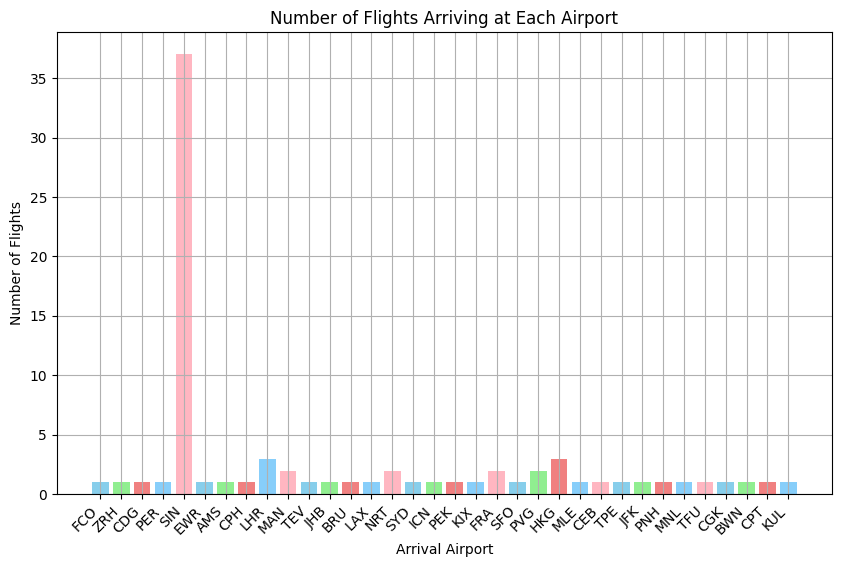

In [ ]:
# המשך משימה שלישית ייצוג הנתונים בגרפים

# גרף 1
flights = json.loads(data)

# ספירת כמות הכניסות/הגעה לכל שדה תעופה
arrival_counts = {}
for flight in flights:
    arrival = flight['arrival']
    if arrival in arrival_counts:
        arrival_counts[arrival] += 1
    else:
        arrival_counts[arrival] = 1

# הכנת הנתונים עבור גרף מקלות
airports = list(arrival_counts.keys())
counts = list(arrival_counts.values())


# צבעים לגרף
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink']

# יצירת גרף מקלות צבעוני
plt.figure(figsize=(10, 6))
plt.bar(airports, counts, color=colors)
plt.xlabel('Arrival Airport')
plt.ylabel('Number of Flights')
plt.title('Number of Flights Arriving at Each Airport')
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.show()

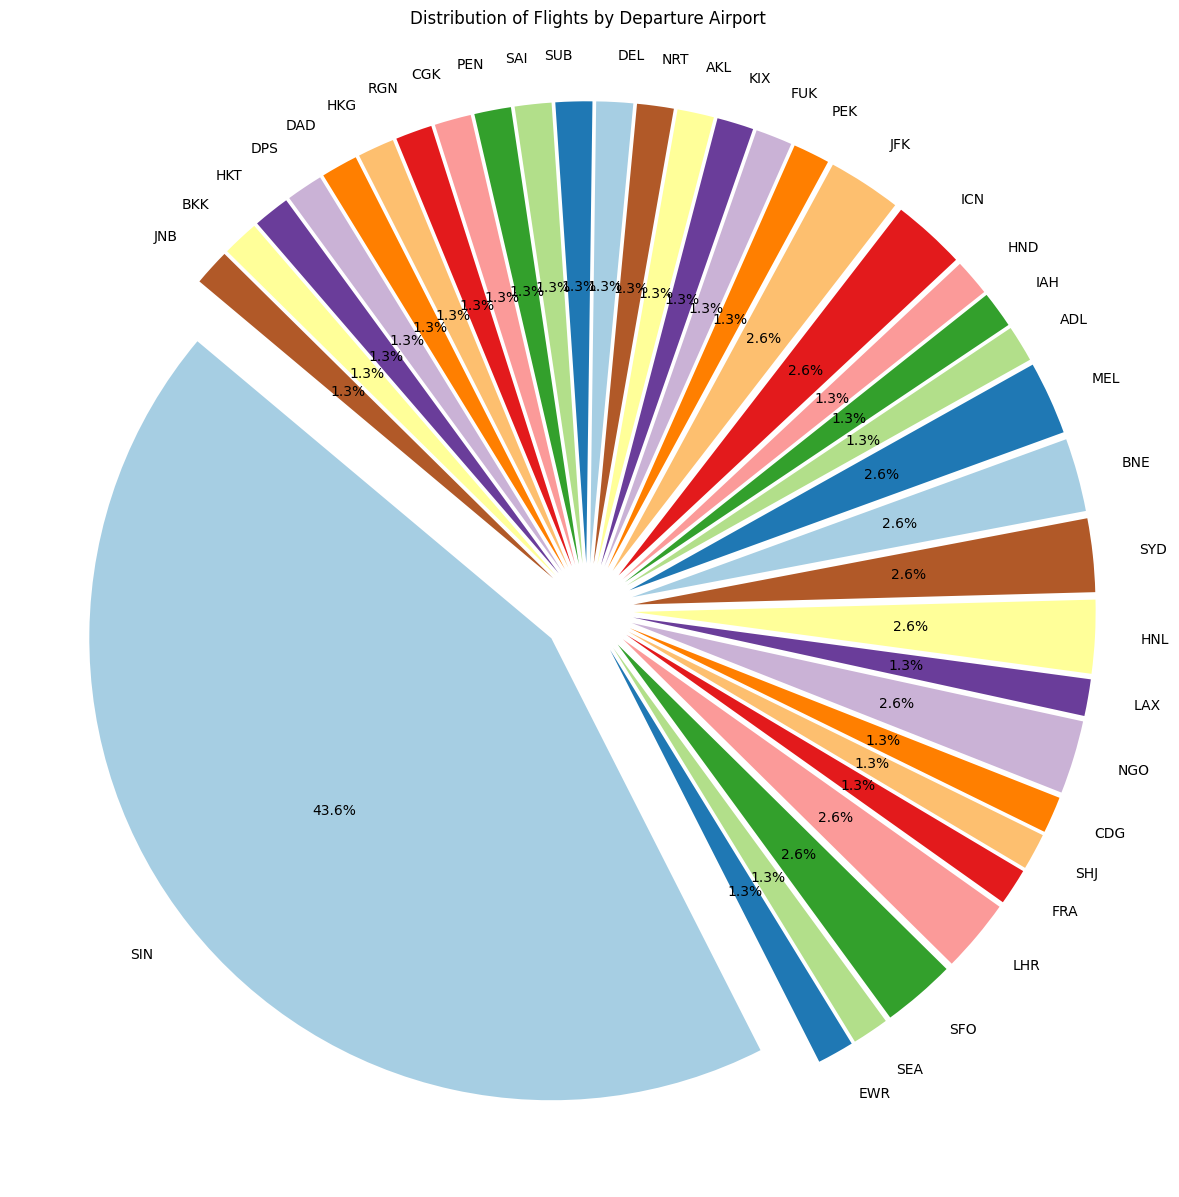

In [ ]:
# המשך משימה שלישית

# גרף 2
# ספירת כמות יציאות/המראות לכל שדה תעופה
departure_counts = {}
for flight in flights:
    departure = flight['departure']
    if departure in departure_counts:
        departure_counts[departure] += 1
    else:
        departure_counts[departure] = 1

# הכנת הנתונים עבור תרשים העוגה
departures = list(departure_counts.keys())
counts = list(departure_counts.values())

explode = [0.1] * len(departures)  # כל משתנה מקבל רווח של 0.1

# יצירת תרשים העוגה
plt.figure(figsize=(15, 15)) # הגדרת גודל הגרף
plt.pie(counts, labels=departures, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors, explode=explode)
plt.title('Distribution of Flights by Departure Airport')
plt.show()


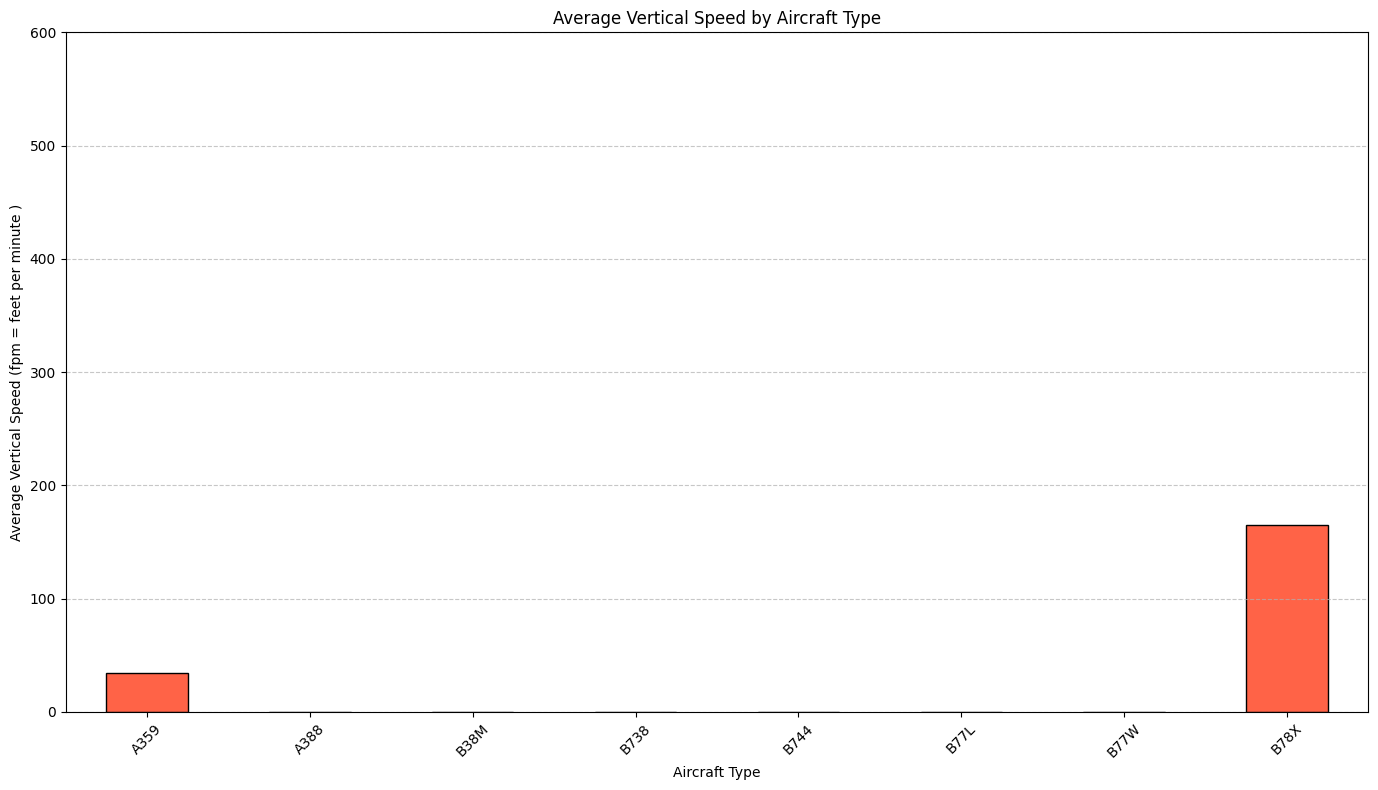

In [ ]:
# המשך משימה שלישית

# גרף 3
# נטען את הנתונים
flights = json.loads(data)

# pandas בעזרת DataFrame - המרת הנתונים ל
df = pd.DataFrame(flights)

# אם יש ערך חסר, נתמלא ב-0 או ערך חסר מתאים .number - ל verticalspeed המרת
df['verticalspeed'] = pd.to_numeric(df['verticalspeed'], errors='coerce').fillna(0)

# חישוב המהירות הממוצעת לפי סוג המטוס
average_verticalspeed = df.groupby('type')['verticalspeed'].mean()

# יצירת גרף מקלות
plt.figure(figsize=(14, 8))

# לפי סוג המטוס verticalspeed יצירת גרף מקלות עם הערכים הממוצעים של
average_verticalspeed.plot(kind='bar', color='tomato', edgecolor='black')

# הגדרת כותרות ועיצוב
plt.xlabel('Aircraft Type')
plt.ylabel('Average Vertical Speed (fpm = feet per minute )')
plt.title('Average Vertical Speed by Aircraft Type')
plt.xticks(rotation=45)  # סיבוב כותרות ציר X כדי להקל על הקריאה
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.ylim(0,600)
plt.show()


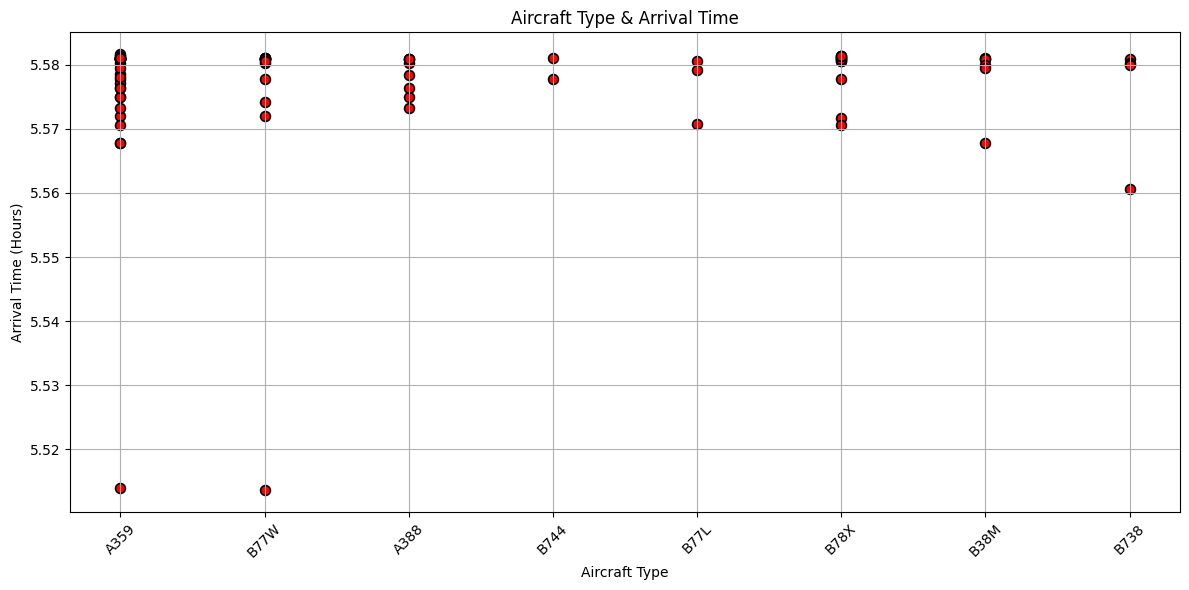

In [ ]:
# המשך משימה שלישית

# גרף 4
# טוען את הנתונים
flights = json.loads(data)

# pandas בעזרת DataFrame - המרת הנתונים ל
df = pd.DataFrame(flights)

# datetime - ל timestamp המרת
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# חישוב זמן הגעה בשעות מהתחלת היום
df['arrival_time_hours'] = df['timestamp'].dt.hour + df['timestamp'].dt.minute / 60 + df['timestamp'].dt.second / 3600

# יצירת גרף סוג המטוס כנגד זמן הגעה בשעות
plt.figure(figsize=(12, 6))
plt.scatter(df['type'], df['arrival_time_hours'], marker='o', s=50, c='red', edgecolors='black', linewidths=1.2)
plt.xlabel('Aircraft Type')
plt.ylabel('Arrival Time (Hours)')
plt.title('Aircraft Type & Arrival Time')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout() # משמשת לתיאום אוטומטי של פרטי הגרף כדי למנוע חפיפות בין אלמנטים שונים בתוך הגרף, כמו טקסטים, תוויות ונתונים plt.tight_layout() הפונקציה
plt.show()


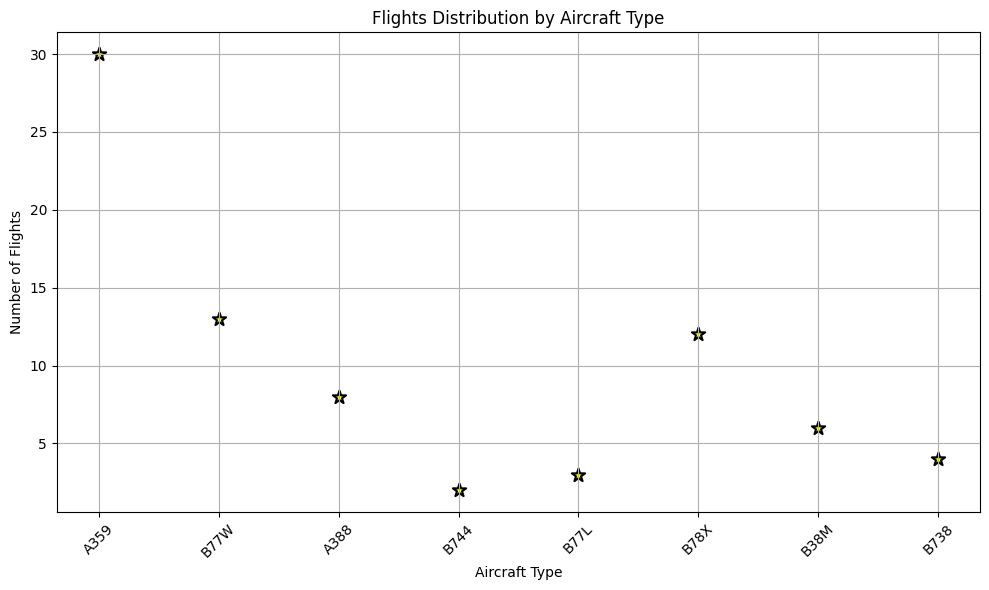

In [ ]:
# המשך משימה שלישית

# גרף 5
# טעינת הנתונים מתוך JSON
flights = json.loads(data)

# ספירת כמות הטיסות לפי סוגי המטוסים
type_counts = {}
for flight in flights:
    aircraft_type = flight['type']
    if aircraft_type in type_counts:
        type_counts[aircraft_type] += 1
    else:
        type_counts[aircraft_type] = 1

# יצירת רשימות עבור נתוני הגרף
types = list(type_counts.keys())
counts = list(type_counts.values())

# יצירת גרף פיזור (scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(types, counts, marker='*', s=100, c='yellow', edgecolors='black', linewidths=1.5)
plt.title('Flights Distribution by Aircraft Type')
plt.xlabel('Aircraft Type')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
#CSV -ו JSON משימה שנייה - שמירת המידע בפורמט

# certifi שמוגדר להשתמש בתעודות מסיפריית SSL עם הקשר HTTPS יצירת חיבור
conn = http.client.HTTPSConnection("flight-data4.p.rapidapi.com", context=ssl.create_default_context(cafile=certifi.where()))

# הגדרת כותרות הבקשה

headers = {
	#"X-RapidAPI-Key": "2bd5f1c14fmsh70d0d0ab3a0a789p1500e6jsnf5c33c45f35d",#Bar
	"X-RapidAPI-Key": "2bd5f1c14fmsh70d0d0ab3a0a789p1500e6jsnf5c33c45f35d",#Jerry
    'x-rapidapi-host': "flight-data4.p.rapidapi.com"
}

#GET שליחת בקשת
conn.request("GET", "/get_airline_flights?airline=SIA", headers=headers)

# קבלת התשובה מהשרת
res = conn.getresponse()
data = res.read()

#למילון JSON המרת התשובה מ
data_dict = json.loads(data.decode("utf-8"))

# מהנתונים המתקבלים DataFrame יצירת
df = pd.DataFrame(data_dict)

#JSON שמירת הנתונים בפורמט
df.to_json('img-flights_data.json', orient='records', lines=True)

#CSV שמירת הנתונים בפורמט
df.to_csv('img-flights_data.csv', index=False)

print("Data has been saved in JSON and CSV formats.")

Data has been saved in JSON and CSV formats.


In [ ]:
# הרחבת משימה שנייה
# הורדת תמונות מאתר
import os                        # ספריית os מספקת פונקציות לגישה לפעולות מערכת קובץ כמו קריאה, כתיבה ומחיקה
import csv                       # ספריית csv מאפשרת קריאה וכתיבה של קבצי CSV
import requests                  # ספריית requests מאפשרת שליחת בקשות HTTP
from bs4 import BeautifulSoup    # ספריית BeautifulSoup מאפשרת ניתוח והפרדת תוכן HTML וXML
from urllib.parse import urljoin # מודול urllib.parse כולל את הפונקציה urljoin שמשמשת לבניית כתובות URL מלאות, מבסיס ותתי-כתובות

def download_image(url, folder_path, image_name): # פונקציה להורדת תמונה ושמירתה
    response = requests.get(url) # שליחת בקשה להורדה מהאתר
    if response.status_code == 200: # בודקים האם יש אישור ממנו
        with open(os.path.join(folder_path, image_name), 'wb') as f: # פותחים את הקובץ לכתיבה ('w') במצב בינארי ('b'),כלומר כותבים את הנתיב בצורה בינארית.
            f.write(response.content)                                # ()os.path.join משמשת ליצירת נתיב מלא לקובץ, כאשר הנתיב מורכב - מנתיב התיקייה folder_path ,ושם הקובץ image_name.

url = 'https://www.booking.com/index.en-gb.html?label=les-ateliers-de-l-image-eVWZESOob43LnfYPmvj*cgS541208359147%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atiaud-2007851543976%3Akwd-297777842071%3Alp1008020%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YTQUGSsRwx9_3qo3uPTHyoo&sid=bb5e513e71551bcce95103857b7af245&gclid=CjwKCAjw9cCyBhBzEiwAJTUWNc3Zv9TTIDsRuhaqukyLXOuRxIILRRxJuPL5fn-eg8vHv-KOvuKpWRoCPRAQAvD_BwE&aid=311984' #כתובת האתר שנספק

response = requests.get(url) # שולחים בקשה לכתובת האתר ע״י הצבת ה-url
soup = BeautifulSoup(response.text, 'html.parser')  # יוצרים אובייקט מסוג BeautifulSoup לניתוח ופירוק תוכן ה-HTML
                                                            # response.text מכיל את התוכן של הדף בפורמט טקסט, 'html.parser', מציין ל-BeautifulSoup באיזה פרסר(תוכנה) להשתמש בו כדי לנתח את תוכן ה-HTML.
folder_path = 'Downloaded_images'   # שם התיקייה שנבחר
if not os.path.exists(folder_path): # בודקים האם תיקייה זו כבר קיימת
    os.makedirs(folder_path)        # אם לא, ניצור תיקייה בשם שבחרנו לשמירת התמונות

img_tags = soup.find_all('img')     # מוצאים את כל תגי ה- <img> בעמוד

image_data = []                     # רשימה ריקה לצורך שמירת המידע על התמונות

for img in img_tags:                 # לולאה שעוברת על כל תגי ה- <img> בכדי להוריד את התמונות
    img_url = img.get('src')         # שולפים את ה-URL של התמונה (ערך התכונה src לפי HTML)
    full_url = urljoin(url, img_url) # משלבים את ה-URL של האתר עם ה-URL של התמונה (למקרה שהתמונה נמצאת בנתיב חסר)
    image_name = os.path.basename(full_url)                  # פונקציית ()os.path.basename מחזירה רק את שם תמונה מהנתיב שניתן לה, ללא הנתיב המלא (ללא ההרחבות)
    download_image(full_url, folder_path, image_name)        # מורידים ושומרים את התמונה לפי הפונקציה שיצרנו
    image_data.append({'name': image_name, 'url': full_url}) # מוסיפים מידע על התמונה לרשימה

csv_file_path = os.path.join(folder_path, 'image_data.csv')  #  יוצרים תיקייה חדשה בשם image_data.csv בתוך התיקייה הכללית folder_path = Downloaded_images
                                                             #  שמירת רשימת המידע על התמונות (image_data) לקובץ CSV בתיקייה חדשה (image_data.csv)
with open(csv_file_path, 'w', newline='') as csv_file:       # מאתחלים את הקובץ לכתיבה
    fieldnames = ['name', 'url']                             # מאתחלים טבלה עם עמודות url ו- name
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames) # מאתחלים את הכתיבה למצב csv אל תוך הקובץ ,אל תוך הטבלה שיצרנו
    writer.writeheader()        # פונקציית ()writer.writeheader משתמשת בספריית csv בפייתון לכתיבת כותרות העמודות (headers) לקובץ CSV.
    for image in image_data:    # עוברים על כול התוכן שהכנסו לרשימת image_data
        writer.writerow(image)  # כותבים את התוכן בעבור כול שורה

json_file_path = os.path.join(folder_path, 'image_data.json') #  יוצרים תיקייה חדשה בשם image_data.json בתוך התיקייה הכללית folder_path = Downloaded_images
                                                              # שמירת רשימת המידע על התמונות (image_data) לקובץ JSON בתיקייה חדשה (image_data.json)
with open(json_file_path, 'w') as json_file:                  # מאתחלים את הקובץ לכתיבה
    json.dump(image_data, json_file) # הפונקציה ()dump בספריית JSON של פייתון משמשת לכתיבת נתונים מתוך מבנה הנתונים image_data
                                     # כאן אין צורך להגדיר את הכתיבה כיוון שהפורמטים תואמים

print("Images downloaded successfully,"
      " and data saved in the folder:","'",folder_path,"'")


Images downloaded successfully, and data saved in the folder: ' Downloaded_images '


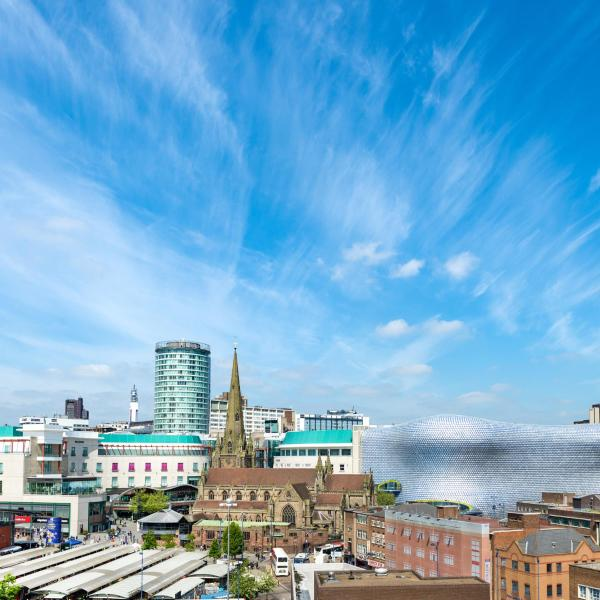

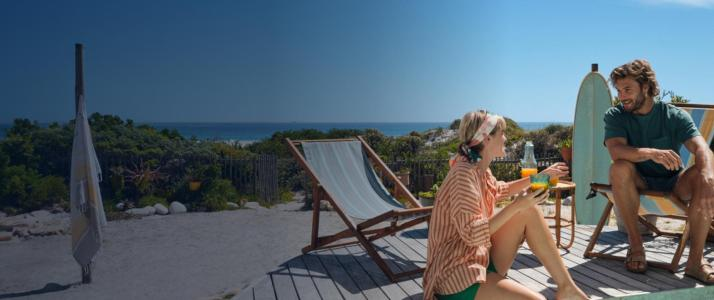

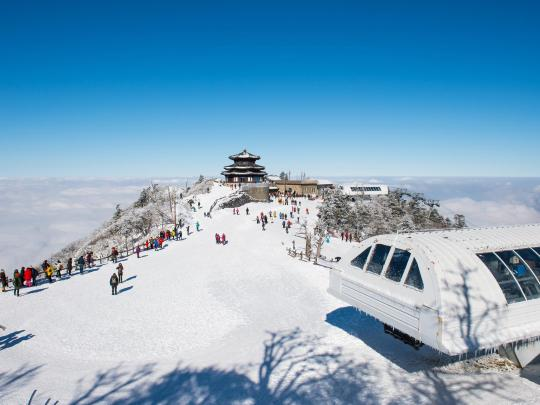

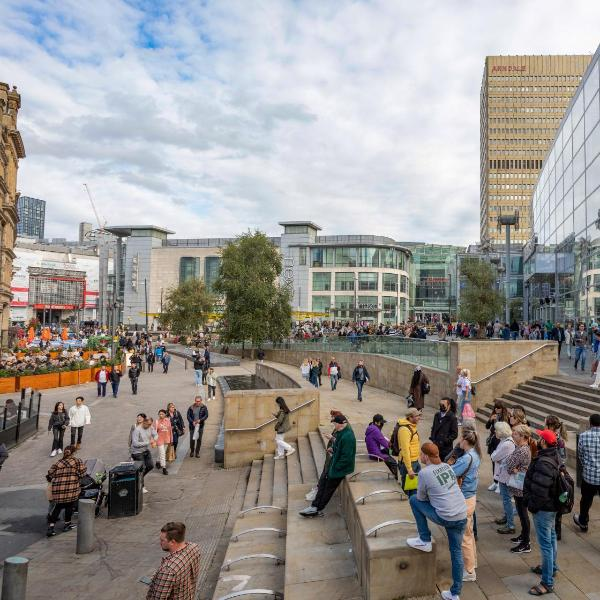

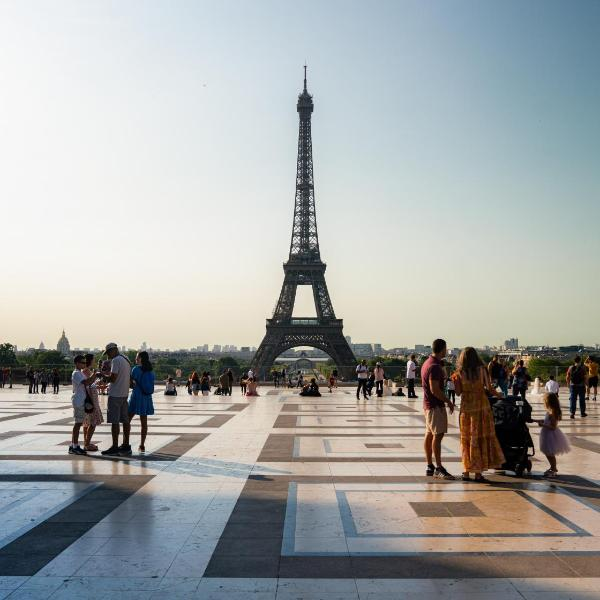

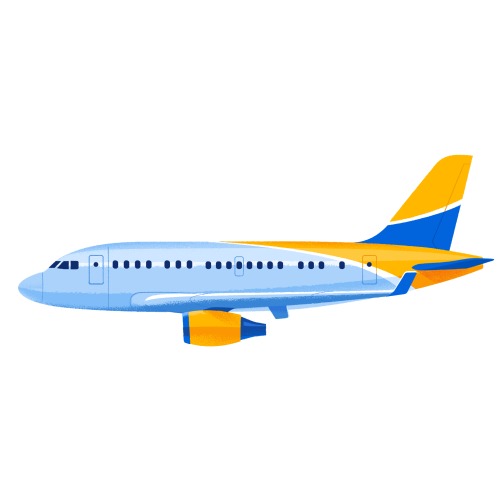

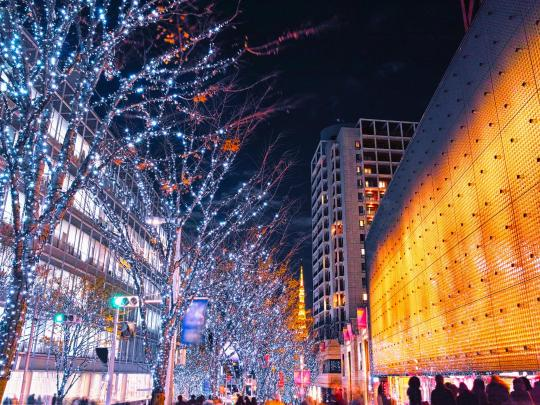

Error loading the file image_data.json is not an image.
Error loading the file logo?ver=0&sid=0272212bee50da7467c537367365854a&t=1723009194 is not an image.


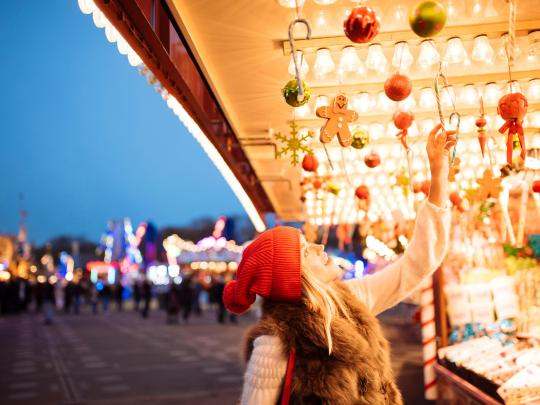

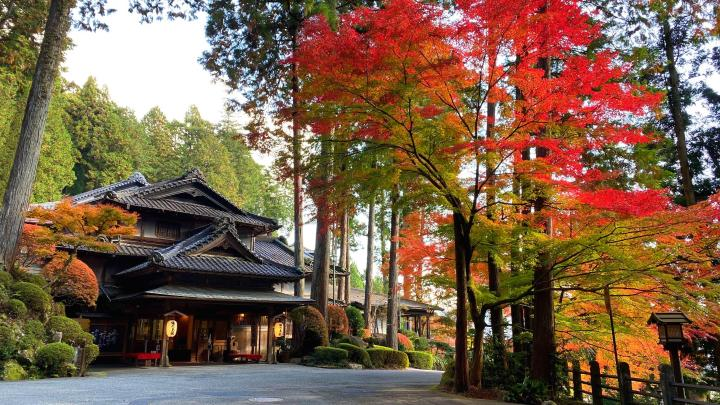

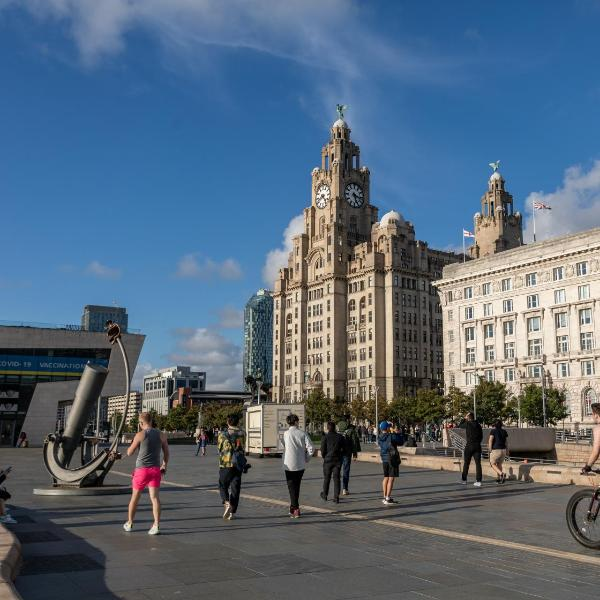

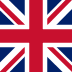

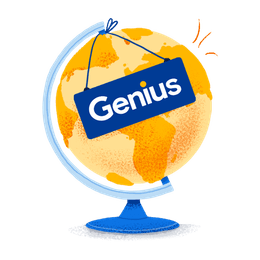

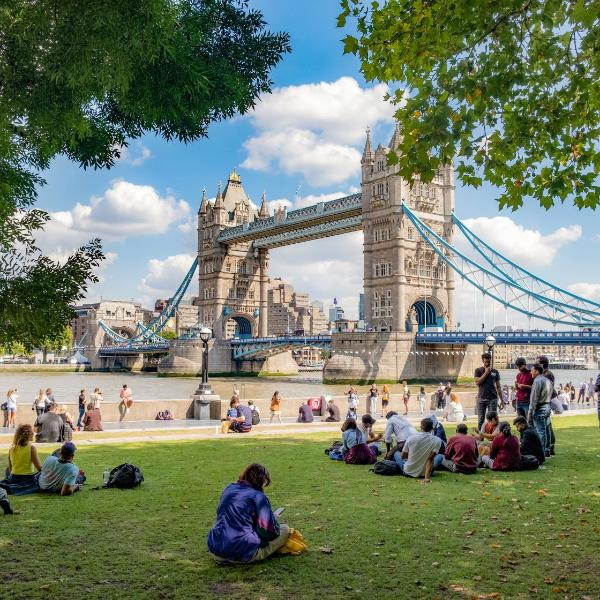

Error loading the file image_data.csv is not an image.


In [ ]:
# המשך הרחבת משימה שנייה
# פתיחת התמונות ששמרנו
                                    # :ייבוא ספריות נדרשות
from PIL import Image               # (Python Imaging Library) מספקת כלים לעיבוד ולעריכת תמונות PIL ספריית
from IPython.display import display # ועוד HTML,היא מכילה פונקציות להצגת תמונות, וידאו, אודיו, טקסט .Colab או Jupyter מספקת כלים להצגת אובייקטים שונים בתוכנת IPython.display ספריית

folder_path = '/content/Downloaded_images'  # נתיב התיקייה שבה נשמרו התמונות

for FileName in os.listdir(folder_path):    # מעבר על כל הקבצים בתיקייה
                                            # מחזירה רשימת שמות של כל הקבצים והתיקיות שנמצאים בתוך שם הקובץ המסופק ()os.listdir הפונקציה
    file_path = os.path.join(folder_path, FileName)  # 'C:/Users/username/Pictures/ + example.jpg' <- כאן אנו יוצרים את הנתיב המלא כולל שם התמונה, לדוגמא

    if os.path.isfile(file_path):        # בודקים אם זהו קובץ רגיל *לא תיקייה*
        try:
            img = Image.open(file_path)  # PIL פותחים את התמונה בעזרת
          # img.show() - Colab/Jupyter לא תומך בתוכנת ה
            display(img)                 # Colab/Jupyter התומכת בתוכנת ה display מציגים את התמונה בעזרת פונקציית
        except IOError:
            print("Error loading the file", FileName, "is not an image.")  # אם המשתנה הוא לא קובץ רגיל ,אז נדפיס את שמו ונדווח על כך